In [ ]:
# Description: The program uses the recurrent artificial neural network called Long Short Term Memory (LSTM)
#              to predict the closing price of APPL corporation.

In [ ]:
#Importing The Required Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')

In [ ]:
#Upgrading Pandas and Pandas DataReader
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 43.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Load The Required Stock Data
startDate = pd.to_datetime('2012-01-01')
endDate = pd.to_datetime(date.today())
df = web.DataReader('AAPL', data_source = 'stooq', start = startDate, end = endDate)
df = df.reindex(index=df.index[::-1])
print(df)

                Open      High       Low     Close        Volume
Date                                                            
2012-01-03   12.4779   12.5577   12.4520   12.5198  3.544907e+08
2012-01-04   12.4849   12.6235   12.4600   12.5866  3.051786e+08
2012-01-05   12.6314   12.7422   12.5627   12.7272  3.178972e+08
2012-01-06   12.7800   12.8717   12.7630   12.8608  3.734286e+08
2012-01-09   12.9525   13.0213   12.8289   12.8408  4.620092e+08
...              ...       ...       ...       ...           ...
2023-05-04  164.8900  167.0400  164.3100  165.7900  8.123543e+07
2023-05-05  170.9750  174.3000  170.7600  173.5700  1.134532e+08
2023-05-08  172.4800  173.8500  172.1100  173.5000  5.596279e+07
2023-05-09  173.0500  173.5400  171.6000  171.7700  4.532687e+07
2023-05-10  173.0200  174.0300  171.9000  173.5550  5.372450e+07

[2857 rows x 5 columns]


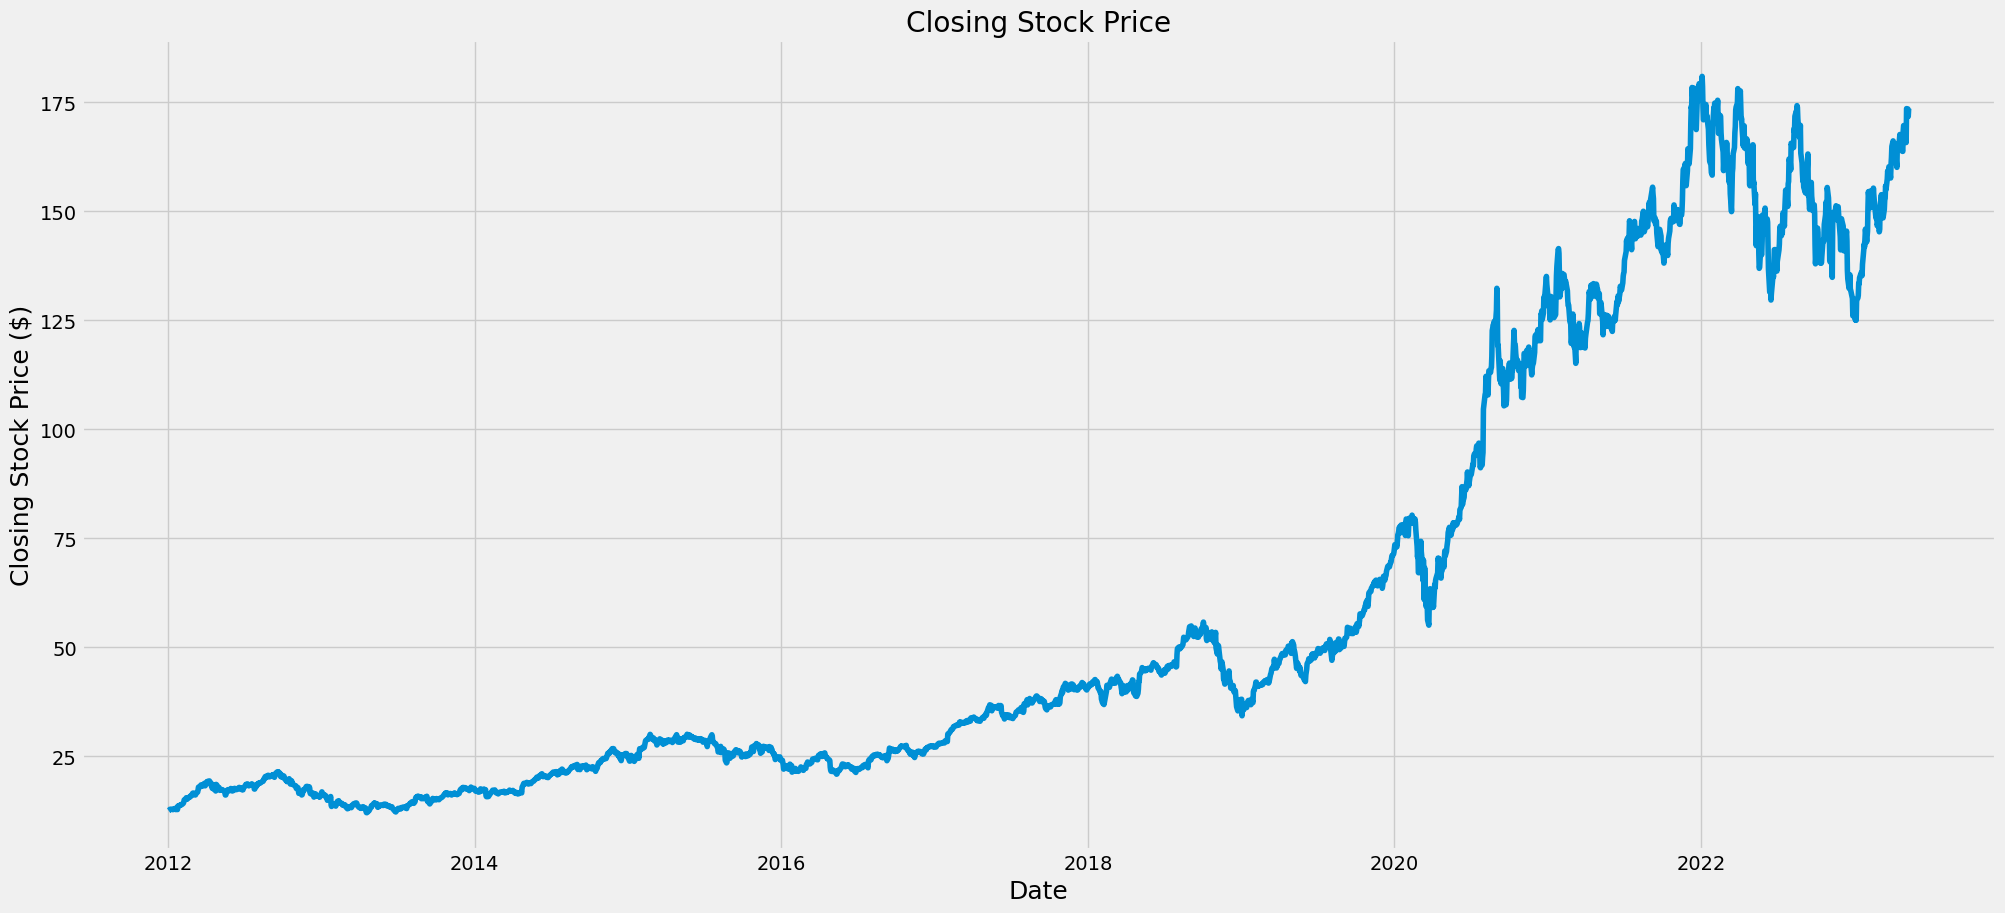

In [ ]:
#Visualize the Closing Stock Price History
plt.figure(figsize=(22,10))
plt.title("Closing Stock Price")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing Stock Price ($)", fontsize = 18)
plt.show()

In [ ]:
#Create A New DataFrame with only Close column
data = df.filter(["Close"])
#Convert DataFrame To Numpy Array
dataset = data.values
# dataset = np.flip(dataset)
#Get The nUmber Of Rows To Train Teh Model On
training_data_len = math.ceil( len(dataset) * 0.8)

training_data_len

2286

In [ ]:
#Scale The Data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00269755],
       [0.00309307],
       [0.00392554],
       ...,
       [0.95584207],
       [0.94559895],
       [0.95616772]])

In [ ]:
#Create The Scaled Trained DataSet
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
#Convert The x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)
#Resize The Arrays
x_train = np.reshape(x_train, ( x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#Build The LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Train The Model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

2226/2226 [==============================] - 102s 44ms/step - loss: 8.4232e-04


In [ ]:
#Create A Training DataSet
test_data = scaled_data[training_data_len - 60 : , : ]
x_test = []
y_test = dataset[training_data_len : , : ]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Convert The data into Numpy Array
x_test = np.array(x_test)
#Reshape The Data
x_test = np.reshape(x_test, ( x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get The Model Predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
#Get The Root Mean Squared Error
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse #Should Be Closer To Zero

18/18 [==============================] - 1s 22ms/step


5.205842960615875

In [ ]:
y_true = y_test.reshape(len(y_test))
y_predict = predictions.reshape(len(predictions))
print(y_true)

[132.346 135.766 135.347 135.496 134.6   133.982 133.722 133.962 131.808
 129.475 128.368 128.528 124.699 124.56  124.051 119.724 119.994 126.454
 123.823 120.792 118.888 120.154 115.149 119.824 118.748 120.692 119.764
 122.695 124.271 123.463 119.276 118.748 122.107 121.26  118.848 119.336
 119.944 120.124 118.668 120.881 121.719 124.6   124.909 126.564 129.007
 131.619 129.874 133.024 130.661 133.094 132.765 133.433 131.728 132.117
 130.571 132.915 133.314 132.984 132.197 132.097 130.093 131.169 126.514
 126.764 128.398 129.076 125.746 124.819 121.699 123.882 126.334 125.178
 123.763 123.603 126.195 124.341 125.996 125.796 125.746 124.191 123.523
 123.195 123.972 122.467 124.799 124.809 125.637 126.026 125.019 126.235
 129.335 128.518 129.016 130.641 129.315 131.15  132.815 132.536 132.257
 131.957 133.602 135.148 135.776 136.075 138.747 140.78  143.313 141.996
 143.851 143.243 144.379 147.849 147.181 145.117 141.21  144.878 144.14
 145.527 147.261 147.69  145.497 143.722 144.379 144

In [ ]:
from sklearn.metrics import accuracy_score

def accuracy(y_true, y_pred):
  acc = accuracy_score(y_test, predictions)
  return accuracy

acc = accuracy(y_true, y_predict)
print(acc)

ValueError: ignored

In [ ]:
#Plot The Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visuavilize The Data
plt.figure(figsize=(22,10))
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing Stock Price ($)", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "Val", "Predictions"], loc = "lower right")
plt.show()

In [ ]:
#Comparing Actual and Predicted Values
valid

In [ ]:
#Get The Quote
apple_quote = web.DataReader('AAPL', data_source = 'stooq', start = startDate, end = endDate)
#Create a new dataframe
new_df = apple_quote.filter(["Close"])
#Get The last 60 days price and convert the dataframe into an array
last_60_days = new_df[:60].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
#Reshape the test
X_test = np.reshape(X_test, ( X_test.shape[0], X_test.shape[1], 1 ))
#Get the predicted price
pred_price = model.predict(X_test)
#Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
apple_quote['Close'][0]